In [183]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import copy

In [34]:
sns.color_palette("Set2")

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [35]:
obj_colors = {
    'rectangle': sns.color_palette("Set2")[0], 
    'triangle': sns.color_palette("Set2")[1], 
    'L': sns.color_palette("Set2")[2], 
}
obj_markers = {
    'rectangle': 's', 
    'triangle': '>', 
    'L': 'o',
}

In [175]:
obj_l = ['obj_'+str(x) for x in list(range(4)) + [6,7,8]]
obj_l

['obj_0', 'obj_1', 'obj_2', 'obj_3', 'obj_6', 'obj_7', 'obj_8']

# Training Curves

In [176]:
dir_path = 'ConditionedCapsule/training_curves/'

In [177]:
df_l = []
for o in obj_l:
    aux_df = pd.read_csv(dir_path + o + '.csv')
    aux_df['object'] = o
    df_l.append(aux_df)
df = pd.concat(df_l)

<Axes: xlabel='million steps', ylabel='Success Rate (%)'>

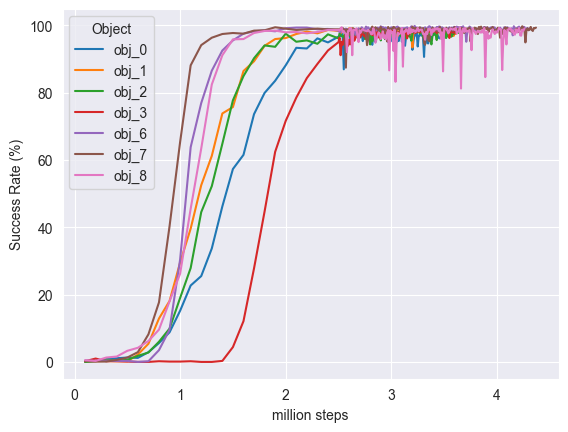

In [178]:
aux_df = df
aux_df['Object'] = aux_df['object']
aux_df['million steps'] = aux_df['Step']/ 1e6
aux_df['Success Rate (%)'] = 100*aux_df['Value']
sns.set_style("darkgrid")
sns.lineplot(aux_df, x='million steps', y='Success Rate (%)', hue='Object')
# plt.savefig('ConditionedCapsule/images/training_curves.png',bbox_inches='tight')

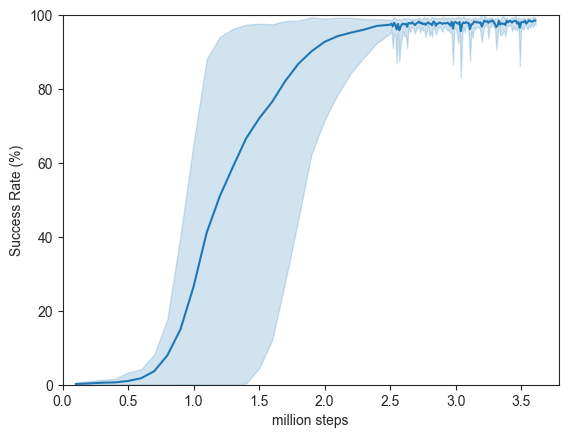

In [184]:
aux_df = copy.deepcopy(df[df['Step'] <= 3_610_000])
aux_df['Object'] = aux_df['object']
aux_df['million steps'] = aux_df['Step']/ 1e6
aux_df['Success Rate (%)'] = 100*aux_df['Value']
sns.set_style("ticks")
ax = sns.lineplot(
    aux_df, x='million steps', y='Success Rate (%)', errorbar=("pi", 100),
    # color=(63/255, 167/255, 214/255)
)
ax.set_ylim(0, 100)
ax.set_xlim(0, )
plt.savefig('ConditionedCapsule/images/training_curves.png',bbox_inches='tight')

# Capsule Width X Success Rate

In [185]:
dir_path = 'ConditionedCapsule/eval_results/'

In [186]:
df_l = []
for o in obj_l:
    aux_df = pd.read_csv(dir_path + o + '.csv')
    aux_df['object'] = o
    df_l.append(aux_df)
df = pd.concat(df_l)

In [187]:
grouped_df = df.groupby(['object','capsule_width']).apply(lambda x: x.mean())

In [188]:
df_l = []
for o in obj_l:
    aux_df = grouped_df.loc[o].reset_index()
    aux_df['object'] = o
    df_l.append(aux_df)
df = pd.concat(df_l).reset_index(drop=True)

<Axes: xlabel='Capsule Width', ylabel='Success Rate (%)'>

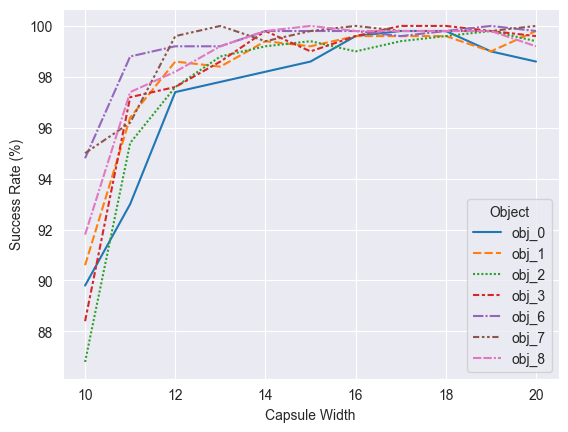

In [189]:
aux_df = df
aux_df['Object'] = aux_df['object']
aux_df['Success Rate (%)'] = 100*aux_df['success']
aux_df['Capsule Width'] = aux_df['capsule_width']
sns.set_style("darkgrid")
sns.lineplot(aux_df, x='Capsule Width', y='Success Rate (%)', hue='Object', style='Object')

<Axes: xlabel='Capsule Width', ylabel='Success Rate (%)'>

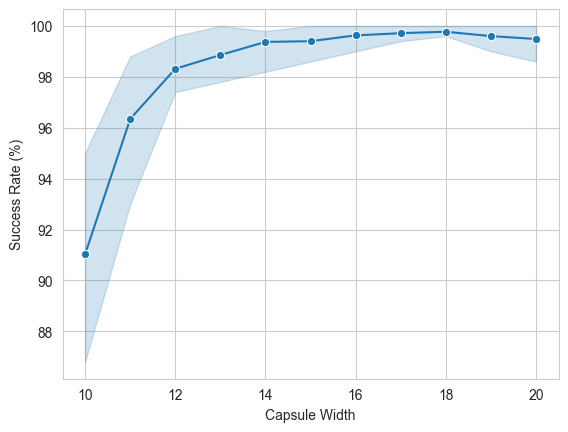

In [190]:
aux_df = df
aux_df['Object'] = aux_df['object']
aux_df['Success Rate (%)'] = 100*aux_df['success']
aux_df['Capsule Width'] = aux_df['capsule_width']
sns.set_style("whitegrid")
sns.lineplot(aux_df, x='Capsule Width', y='Success Rate (%)', errorbar=("pi", 100), marker='o')

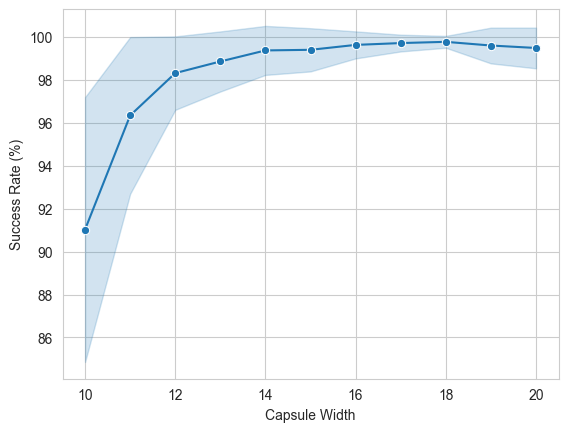

In [191]:
aux_df = df
aux_df['Object'] = aux_df['object']
aux_df['Success Rate (%)'] = 100*aux_df['success']
aux_df['Capsule Width'] = aux_df['capsule_width']
sns.set_style("whitegrid")
sns.lineplot(aux_df, x='Capsule Width', y='Success Rate (%)', errorbar=("sd", 2), marker='o')
plt.savefig('ConditionedCapsule/images/width_x_success.png',bbox_inches='tight')

# Capsule Width x Time, when successful

In [82]:
dir_path = 'ConditionedCapsule/eval_results/'

In [83]:
df_l = []
for o in obj_l:
    aux_df = pd.read_csv(dir_path + o + '.csv')
    aux_df['object'] = o
    df_l.append(aux_df)
df = pd.concat(df_l)

In [84]:
df = df[df['success']]

In [85]:
grouped_df = df.groupby(['object','capsule_width']).apply(lambda x: x.mean())
df_l = []
for o in obj_l:
    aux_df = grouped_df.loc[o].reset_index()
    aux_df['object'] = o
    df_l.append(aux_df)
df = pd.concat(df_l).reset_index(drop=True)

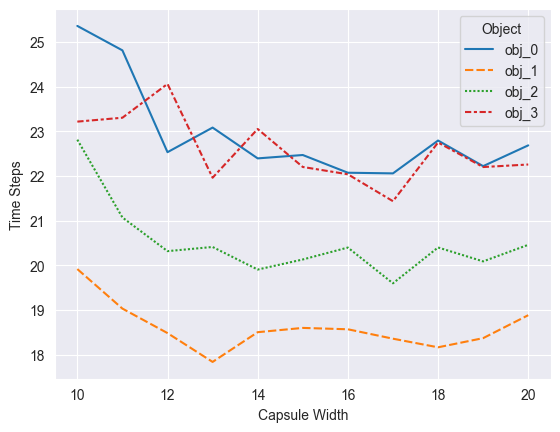

In [87]:
aux_df = df
aux_df['Object'] = aux_df['object']
aux_df['Time Steps'] = aux_df['time_steps']
aux_df['Capsule Width'] = aux_df['capsule_width']
sns.set_style("darkgrid")
sns.lineplot(aux_df, x='Capsule Width', y='Time Steps', hue='Object', style='Object')
plt.savefig('ConditionedCapsule/images/width_x_time.png',bbox_inches='tight')

# EvalCallback

In [88]:
dir_path = 'ConditionedCapsule/callback_eval/'

In [92]:
aux_arr = np.load(dir_path +  'obj_0.npz')

In [97]:
aux_arr['results'].shape

(97, 1000)

In [105]:
aux_arr

NpzFile 'ConditionedCapsule/callback_eval/obj_0.npz' with keys: timesteps, results, ep_lengths, successes

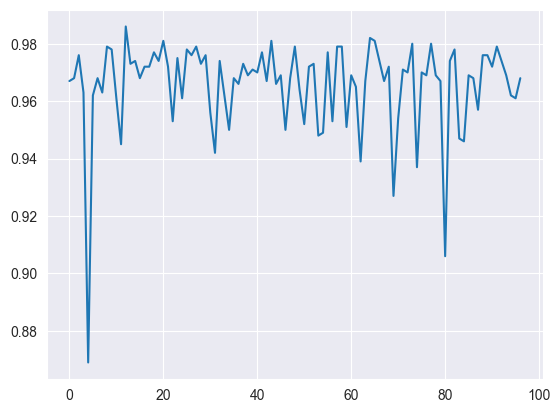

In [109]:
plt.plot(aux_arr['successes'].mean(axis=1))

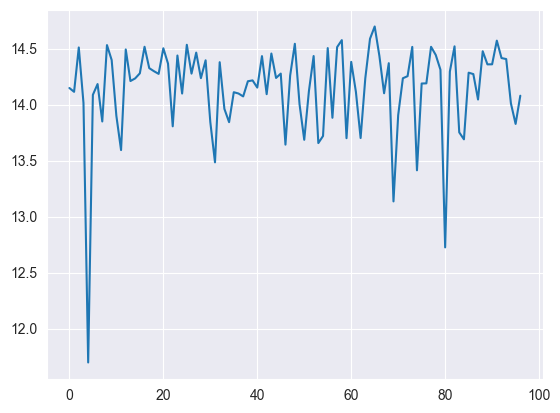

In [108]:
x = aux_arr['results'].mean(axis=1)
plt.plot(x)

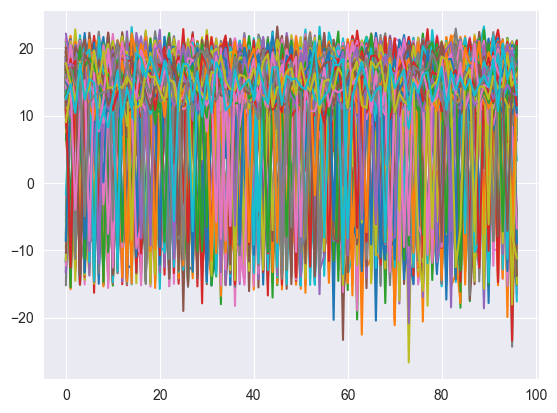

In [95]:
plt.plot(aux_arr['results'])

# Trajectories in Capsule - Examples

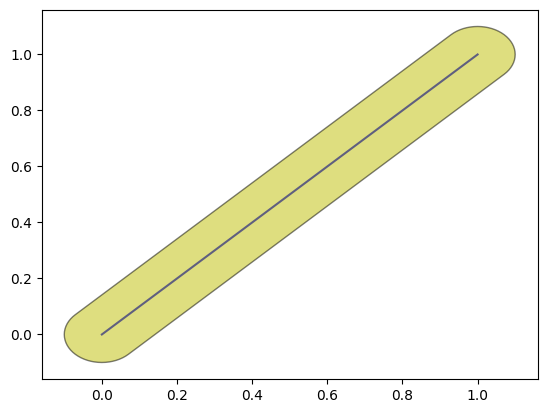

In [2]:
import sys
sys.path.append('../.')

import matplotlib.pyplot as plt
from shapely.geometry import LineString
from research_envs.path_planning.descartes_mod.patch import PolygonPatch

# Create a LineString
line = LineString([(0, 0), (1, 1)])

# Dilate the line
dilated_line = line.buffer(0.1)

# Plot the original line
x, y = line.xy
plt.plot(x, y, 'b')

# Plot the dilated line
patch = PolygonPatch(dilated_line, fc='y', alpha=0.5, zorder=2)
plt.gca().add_patch(patch)

plt.show()

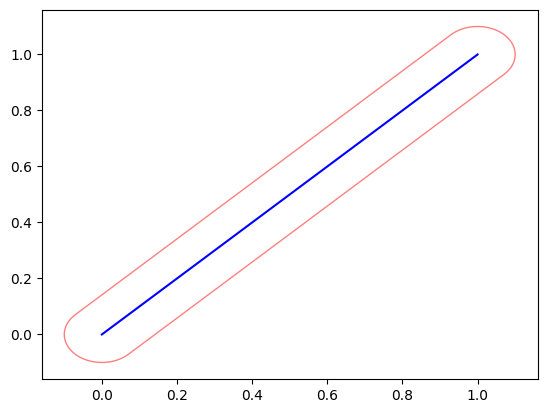

In [3]:
# Create a LineString
line = LineString([(0, 0), (1, 1)])

# Dilate the line
dilated_line = line.buffer(0.1)

# Plot the original line
x, y = line.xy
plt.plot(x, y, 'b')

# Plot the outline of the dilated line
patch = PolygonPatch(dilated_line, fc='none', ec='r', alpha=0.5, zorder=2)
plt.gca().add_patch(patch)

plt.show()

In [4]:
patch